In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons

In [5]:
x,y=make_moons(n_samples=100, noise=0.25, random_state=42)

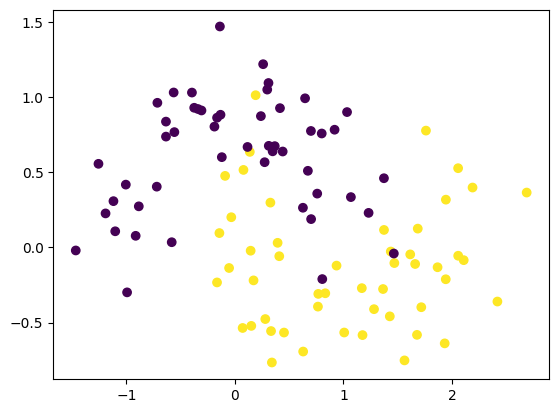

In [8]:
plt.scatter(x[:,0], x[:,1], c=y)

In [22]:
LAYERS=[
    tf.keras.layers.Dense(128, activation='relu', input_dim=2),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1),
]

In [23]:
model_reg=tf.keras.models.Sequential(LAYERS)

In [24]:
model_reg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               384       
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
 dense_12 (Dense)            (None, 5)                 55        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1735 (6.78 KB)
Trainable params: 1735 (6.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
LOSS='mse'
OPTIMIZER='sgd'
metrics=['accuracy']
model_reg.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=metrics)

In [26]:
history1=model_reg.fit(x, y, epochs=20, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 3s 120ms/step - loss: 0.6861 - accuracy: 0.5250 - val_loss: 0.6840 - val_accuracy: 0.4000
Epoch 2/20
3/3 [==============================] - 0s 15ms/step - loss: 0.5263 - accuracy: 0.5250 - val_loss: 0.5637 - val_accuracy: 0.4000
Epoch 3/20
3/3 [==============================] - 0s 15ms/step - loss: 0.4316 - accuracy: 0.5250 - val_loss: 0.4605 - val_accuracy: 0.4000
Epoch 4/20
3/3 [==============================] - 0s 14ms/step - loss: 0.3459 - accuracy: 0.5250 - val_loss: 0.3480 - val_accuracy: 0.4000
Epoch 5/20
3/3 [==============================] - 0s 15ms/step - loss: 0.2693 - accuracy: 0.5250 - val_loss: 0.2827 - val_accuracy: 0.4000
Epoch 6/20
3/3 [==============================] - 0s 20ms/step - loss: 0.2260 - accuracy: 0.5250 - val_loss: 0.2528 - val_accuracy: 0.4000
Epoch 7/20
3/3 [==============================] - 0s 14ms/step - loss: 0.2030 - accuracy: 0.6125 - val_loss: 0.2329 - val_accuracy: 0.6500
Epoch 8/20
3/3 [==========

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

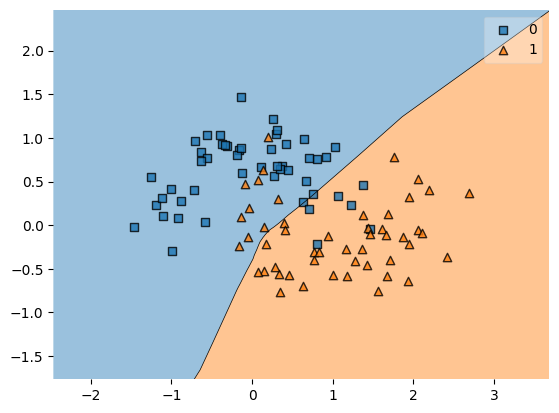

In [27]:
plot_decision_regions(x, y, clf=model_reg)

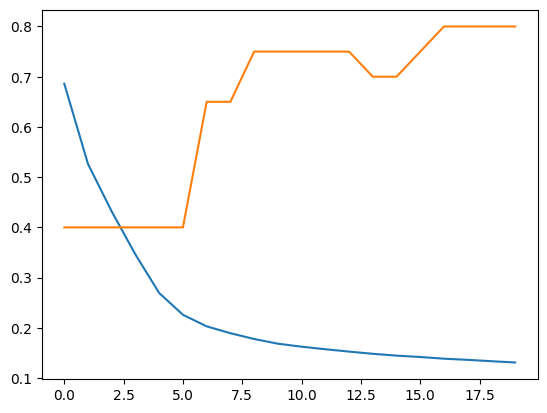

In [30]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_accuracy'])

## USing regularization technique.

In [31]:
LAYERS=[
    tf.keras.layers.Dense(128, activation='relu', input_dim=2, kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dense(1),
]

In [32]:
model_reg2=tf.keras.models.Sequential(LAYERS)

In [33]:
LOSS='mse'
OPTIMIZER='sgd'
metrics=['accuracy']
model_reg2.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=metrics)

In [34]:
history2=model_reg2.fit(x, y, epochs=20, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 1s 92ms/step - loss: 1.2065 - accuracy: 0.5250 - val_loss: 1.2542 - val_accuracy: 0.4000
Epoch 2/20
3/3 [==============================] - 0s 17ms/step - loss: 1.0771 - accuracy: 0.5250 - val_loss: 1.1368 - val_accuracy: 0.4000
Epoch 3/20
3/3 [==============================] - 0s 15ms/step - loss: 0.9863 - accuracy: 0.5250 - val_loss: 1.0447 - val_accuracy: 0.4000
Epoch 4/20
3/3 [==============================] - 0s 16ms/step - loss: 0.9184 - accuracy: 0.5250 - val_loss: 0.9788 - val_accuracy: 0.4000
Epoch 5/20
3/3 [==============================] - 0s 14ms/step - loss: 0.8716 - accuracy: 0.5250 - val_loss: 0.9308 - val_accuracy: 0.4000
Epoch 6/20
3/3 [==============================] - 0s 15ms/step - loss: 0.8365 - accuracy: 0.5250 - val_loss: 0.8922 - val_accuracy: 0.4000
Epoch 7/20
3/3 [==============================] - 0s 15ms/step - loss: 0.8082 - accuracy: 0.5250 - val_loss: 0.8652 - val_accuracy: 0.4000
Epoch 8/20
3/3 [===========

9600/9600 [==============================] - 25s 3ms/step


<Axes: >

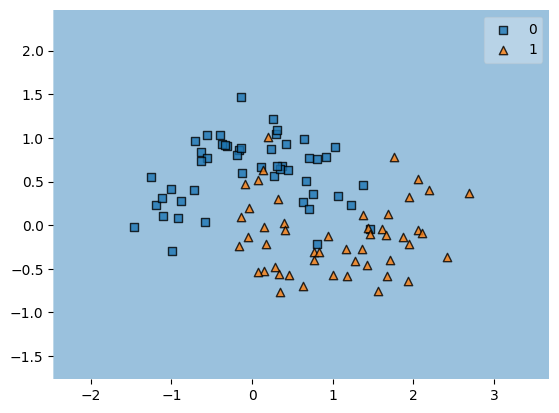

In [35]:
plot_decision_regions(x, y, clf=model_reg2)

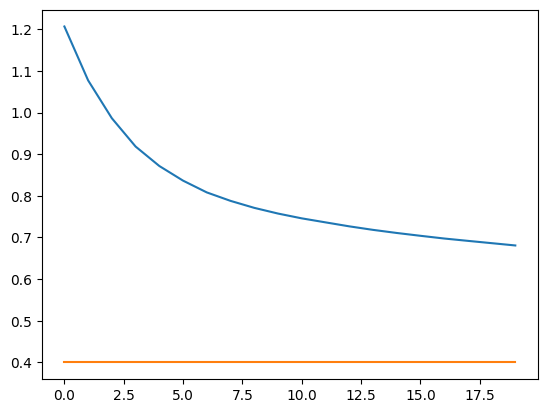

In [37]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_accuracy'])